# Geopandas

https://geopandas.org/ 

Est la bibliothèque bermettant d'utiliser des dataframe géographiques (geodataframes). Vous devirez déjà l'avoir installée mais dans le doute, remettons la procédure

## Bases 

### tutos

* https://www.youtube.com/watch?v=t7lliJXFt8w : introduction à geopandas
* https://www.youtube.com/watch?v=xJyJlKbZFlc&list=PLewNEVDy7gq3DjrPDxGFLbHE4G2QWe8Qh : les 7 premières vidéos

### geodataframe

In [1]:
import geopandas as gpd

Importer des données se fait avec [read_file](https://geopandas.org/reference/geopandas.read_file.html?highlight=read_file). On l'a vu en 1.1 cette méthdoe lit tout un tas de format de données (geojson, shp, fichier zip shp, ...) qu'ils soient le local sur votre disque dur ou sur internet.


In [2]:
regions = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions.geojson")

In [3]:
regions.head()

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ..."
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.62655 46.75228, ..."
3,28,Normandie,"MULTIPOLYGON (((-1.11962 49.35557, -1.11554 49..."
4,32,Hauts-de-France,"POLYGON ((4.14090 49.97876, 4.14407 49.97625, ..."


geopandas manipule des [GeoDataframe](https://geopandas.org/reference/geopandas.GeoDataFrame.html?highlight=geodataframe) tout comme pandas manipule des [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). 

La principale différence visible est un type geometry (qui est dans la colonne `geometry`) qui contient nos données spaciales :

In [4]:
regions.dtypes

code          object
nom           object
geometry    geometry
dtype: object

In [5]:
regions.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

La colonne nommée geometry est une [GeoSeries](https://geopandas.org/reference/geopandas.GeoSeries.html). 

Il est **indispensable** qu'une geodataframe ait :

* une colonne nommée `geometry` qui soit une geoseries (une geoseries qui n'est pas nommée geometry ne sera pas prise en compte et une colonne geometry qui n'est pas une geoserie fera planter tôt ou tard geopandas).
* un crs de renseigné (sinon, tôt ou tard un calcul ne se fera pas comme il faut).

In [6]:
regions['geometry']

0     POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...
1     POLYGON ((2.87463 47.52042, 2.87984 47.51671, ...
2     POLYGON ((3.62942 46.74946, 3.62655 46.75228, ...
3     MULTIPOLYGON (((-1.11962 49.35557, -1.11554 49...
4     POLYGON ((4.14090 49.97876, 4.14407 49.97625, ...
5     POLYGON ((4.23316 49.95775, 4.23690 49.95858, ...
6     MULTIPOLYGON (((-2.62284 47.40975, -2.62341 47...
7     MULTIPOLYGON (((-3.47716 48.88127, -3.47863 48...
8     MULTIPOLYGON (((1.41519 46.34722, 1.41675 46.3...
9     MULTIPOLYGON (((1.78613 42.57362, 1.78661 42.5...
10    POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...
11    MULTIPOLYGON (((6.94834 44.65482, 6.94769 44.6...
12    MULTIPOLYGON (((8.58640 41.87389, 8.58667 41.8...
Name: geometry, dtype: geometry

Le format des données est [geojson](https://fr.wikipedia.org/wiki/GeoJSON). En particulier, ce format permet de créer des points, des lignes ou des polygones.

**Note** : il n'a pas de cercle car la projection de cercles sur des cartes peut être compliquée.

En python, ces formes sont gérées par [shapely](https://shapely.readthedocs.io/en/latest/)) :

In [7]:
type(regions['geometry'][0])

shapely.geometry.polygon.Polygon

On peut bien sur représenter la dataframe (ligne à ligne) :

<Axes: >

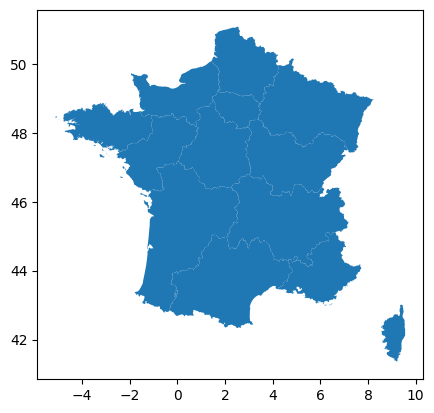

In [8]:
regions.plot()

juste sa géométrie : 

<Axes: >

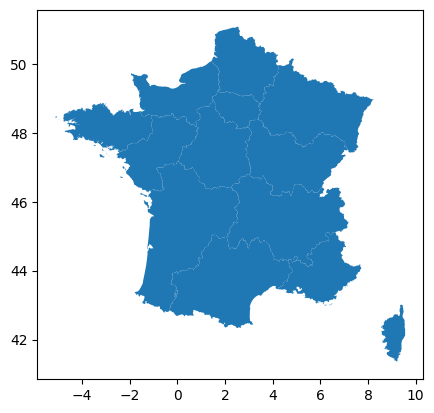

In [9]:
regions['geometry'].plot()

ou une forme (sans plot) :

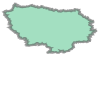

In [10]:
regions['geometry'][0]

### manipulations

Tou ce que vous faites avec pandas est également possible avec geopandas. On ajoute en plus des traitements de données spaciales 2D :

* des manipulations de données spaciales (grace à la bibliothèque [shapely](https://shapely.readthedocs.io/en/latest/))
* des représentation graphique avec [plot](https://geopandas.org/reference.html?highlight=plot#geopandas.GeoDataFrame.plot)

## Création d'un geodataframe

On va créer un geodataframe avec les villes française.

### données brutes

On prend les données de ce site : https://sql.sh/736-base-donnees-villes-francaises en csv.

In [11]:
import pandas as pd

In [12]:
villes_raw = pd.read_csv("https://sql.sh/ressources/sql-villes-france/villes_france.csv", 
                     header=None, index_col=0)

/var/folders/23/_kd8rqjx423dszx5j15npw7w0000gn/T/ipykernel_18433/3271959885.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  villes_raw = pd.read_csv("https://sql.sh/ressources/sql-villes-france/villes_france.csv",


In [13]:
villes_raw.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,,,,,,,,,,,,,,,,,,,,,
1,1,ozan,OZAN,ozan,Ozan,O250,OSN,01190,284,1284,...,93,6.60,4.91667,46.3833,2866.0,51546.0,45456.0,462330.0,170.0,205.0
2,1,cormoranche-sur-saone,CORMORANCHE-SUR-SAONE,cormoranche sur saone,Cormoranche-sur-Saône,C65652625,KRMRNXSRSN,01290,123,1123,...,107,9.85,4.83333,46.2333,2772.0,51379.0,44953.0,461427.0,168.0,211.0
3,1,plagne-01,PLAGNE,plagne,Plagne,P425,PLKN,01130,298,1298,...,20,6.20,5.73333,46.1833,3769.0,51324.0,54342.0,461131.0,560.0,922.0
4,1,tossiat,TOSSIAT,tossiat,Tossiat,T230,TST,01250,422,1422,...,138,10.17,5.31667,46.1333,3309.0,51268.0,51854.0,460828.0,244.0,501.0
5,1,pouillat,POUILLAT,pouillat,Pouillat,P430,PLT,01250,309,1309,...,14,6.23,5.43333,46.3333,3435.0,51475.0,52542.0,461938.0,333.0,770.0


In [14]:
villes_raw.loc[4440]

1                                                    13
2                                             marseille
3                                             MARSEILLE
4                                             marseille
5                                             Marseille
6                                                  M624
7                                                  MRSL
8     13001-13002-13003-13004-13005-13006-13007-1300...
9                                                    55
10                                                13055
11                                                    3
12                                                 99.0
13                                                  2.0
14                                               850726
15                                               797491
16                                               851400
17                                                 3535
18                                              

**Attntion** aux données. L'analyse de Marseille montre que les noms de colonnes du site sont fantaisistes (ça n'a pas du passer les mise à jour successives...). Il vaut mieux mettre directement le nom des colonnes dans le tableau...

Ce cas est loin d'être particulier. Donc faites toujours attentions aux données que vous récupérez

Après analyse des correspondance on voit que : 
* le nom : colonne 5
* la population en 2010 : colonne 14
* les coordonnées gps :
    * longitude : 19
    * latitude : 20

In [15]:
mes_villes = villes_raw[[5, 14, 19, 20]].rename({5: "nom", 14: "population", 19: "longitude", 20: "latitude"}, axis=1)

In [16]:
mes_villes

,nom,population,longitude,latitude
0,,,,
1,Ozan,618,4.91667,46.38330
2,Cormoranche-sur-Saône,1058,4.83333,46.23330
3,Plagne,129,5.73333,46.18330
4,Tossiat,1406,5.31667,46.13330
5,Pouillat,88,5.43333,46.33330
...,...,...,...,...
36825,Sada,10195,45.10470,-12.84860
36826,Tsingoni,10454,45.10700,-12.78970
36827,Saint-Barthélemy,8938,-62.83330,17.91670


In [17]:
mes_villes.loc[4440]

nom           Marseille
population       850726
longitude       5.37639
latitude        43.2967
Name: 4440, dtype: object

### conversion en geodataframe

Il faut transformer nos coordonnées latitude/longitude GPS en point shapely.

#### un point shapely

Nos coordonnées vont être des [Points](https://shapely.readthedocs.io/en/stable/manual.html#points), avec d'abord la longitude puis la latitude (abcisse puis ordonnée).

In [18]:
from shapely.geometry import Point

In [19]:
coordonnee_marseille = Point(mes_villes.loc[4440]['longitude'], mes_villes.loc[4440]['latitude'])

In [20]:
print(coordonnee_marseille)

POINT (5.37639 43.2967)


Il n'y a pas de crs par défaut sur un point, c'est juste un point. Pour transformer un point, il faut cependant connaitre son crs d'origne pour pouvoir trouver ses coordonnées dans le crs d'arrivé.

Le crs de shapely et de geopandas est géré par la bipliothèque [pyproj](http://pyproj4.github.io/pyproj/stable/). C'est très pratique car ce permet de faire toutes les projections que l'on veut très facilement (y'a juste un peu de doc à lire).

In [21]:
import pyproj

Nos points sont dans le crs du gps :

In [22]:
wgs84 = pyproj.CRS('epsg:4326') 

Et on veut les voir dans les coordonnées [UTM](http://www.centcols.org/additifs/2008/auto_additif/guide_UTM.htm) :

Pour Marseille, c'est la 31ème zone de l'hémisphère nord donc l'epsg 32600 + 31 (32700 pour l'hémisphère sud)

In [23]:
utm = pyproj.CRS('epsg:32631')

Puis on convertit :

In [24]:
from shapely.ops import transform

project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform

In [25]:
utm_pt = transform(project, coordonnee_marseille)

In [26]:
print(utm_pt)

POINT (692764.4151899549 4796505.91193845)


Ouf, ça à l'air correct : [Zone 31T E: 692228.9 N: 4796466.46](https://www.coordonneesgps.net/coordonnees-gps/marseille-13000-4215-ville).


**Note** : l'epsg est vrai pour toute les latitude Nord, le [cadrillage UTM](https://fr.wikipedia.org/wiki/Syst%C3%A8me_de_r%C3%A9f%C3%A9rence_de_carroyage_militaire) est plus fin et sépare les latitude en 20 lettre (T, c'est dans le coin de Marseille).

#### avec geopandas

On peut le faire directmeent en geopandas avec [points_from_xy](https://geopandas.org/reference/geopandas.points_from_xy.html) qui crée ainsi directement une colonne (notre geometry) : 

In [27]:
mes_villes["longitude"]

0
1         4.91667
2         4.83333
3         5.73333
4         5.31667
5         5.43333
           ...   
36825    45.10470
36826    45.10700
36827   -62.83330
36828    18.09130
36830    46.71070
Name: longitude, Length: 36700, dtype: float64

In [28]:
print(coordonnee_marseille)

POINT (5.37639 43.2967)


In [29]:
les_points = gpd.points_from_xy(x=mes_villes["longitude"], y=mes_villes["latitude"],
                   crs='epsg:4326')

In [30]:
les_points

<GeometryArray>
[  <POINT (4.917 46.383)>,   <POINT (4.833 46.233)>,   <POINT (5.733 46.183)>,
   <POINT (5.317 46.133)>,   <POINT (5.433 46.333)>,     <POINT (5.4 45.917)>,
     <POINT (4.883 46.3)>,   <POINT (5.583 46.033)>,     <POINT (5.933 46.2)>,
    <POINT (4.95 46.083)>,
 ...
 <POINT (45.232 -12.781)>, <POINT (45.068 -12.701)>, <POINT (45.087 -12.762)>,
 <POINT (45.138 -12.848)>, <POINT (45.276 -12.798)>, <POINT (45.105 -12.849)>,
  <POINT (45.107 -12.79)>, <POINT (-62.833 17.917)>, <POINT (18.091 -63.083)>,
   <POINT (46.711 1.718)>]
Length: 36700, dtype: geometry

#### création du geodataframe

On peut maintenant créer notre geodataframe

In [31]:
villes = gpd.GeoDataFrame(mes_villes, geometry=les_points)

In [32]:
villes.head()

,nom,population,longitude,latitude,geometry
0,,,,,
1,Ozan,618,4.91667,46.3833,POINT (4.91667 46.38330)
2,Cormoranche-sur-Saône,1058,4.83333,46.2333,POINT (4.83333 46.23330)
3,Plagne,129,5.73333,46.1833,POINT (5.73333 46.18330)
4,Tossiat,1406,5.31667,46.1333,POINT (5.31667 46.13330)
5,Pouillat,88,5.43333,46.3333,POINT (5.43333 46.33330)


In [33]:
villes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Y'a du monde dans le monde : 

<Axes: >

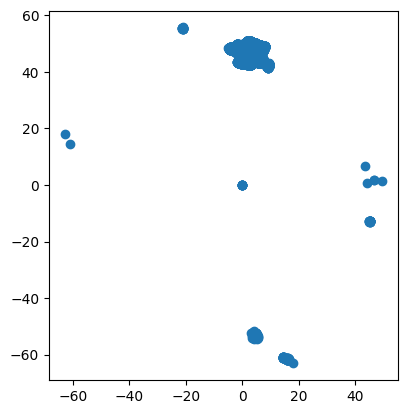

In [34]:
villes.plot()

Pour y voir plus clair utilisons la bibliothèque [`contextily`](https://contextily.readthedocs.io) pour ajouter un fond de carte :

In [35]:
import matplotlib.pyplot as plt
import contextily as ctx

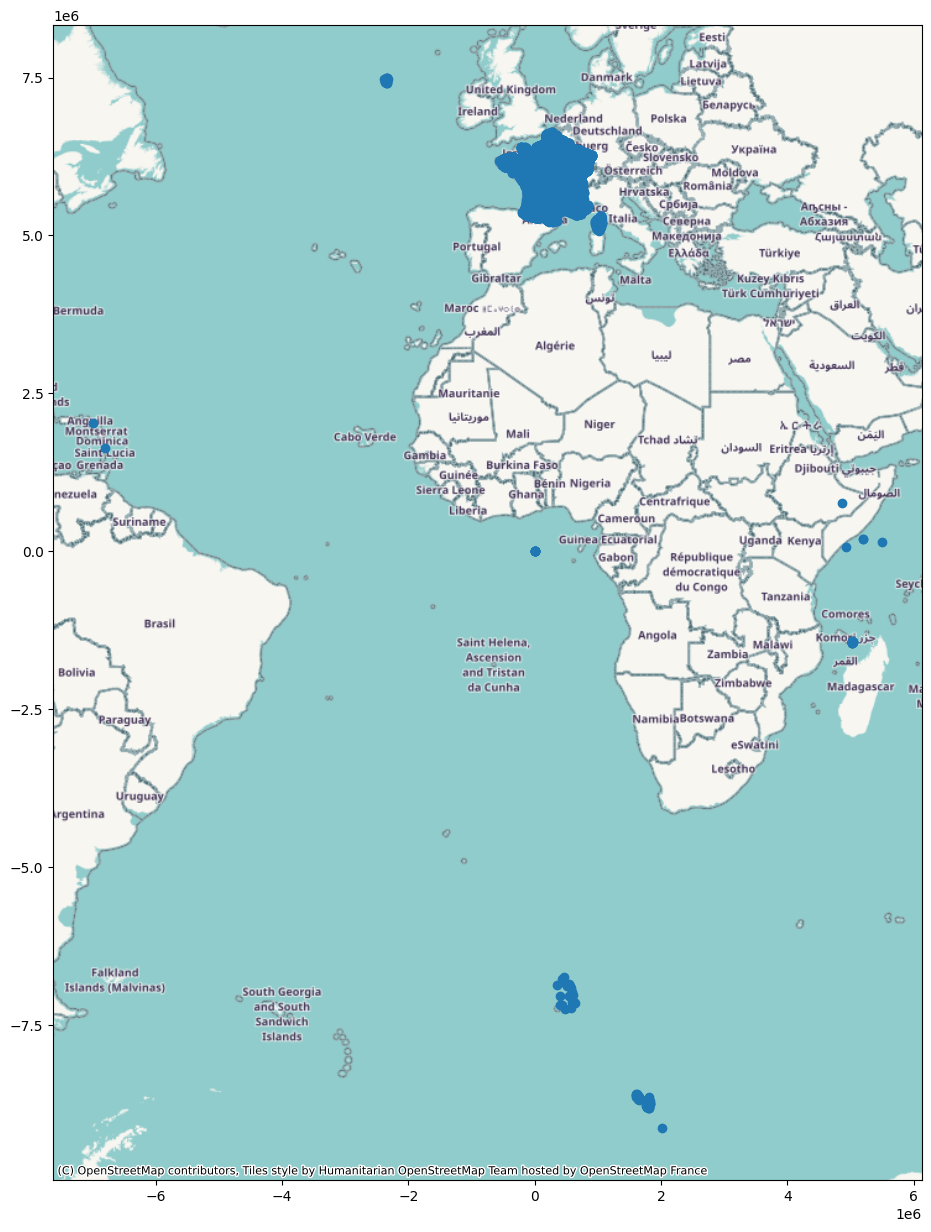

In [36]:
fig, ax = plt.subplots(figsize=(15, 15)) 

villes.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax, crs="epsg:3857")

plt.show()

Y'a des choses bizarres... Mais avant de régler ces choses, utilisons un autre fond de carte, `contextily en a [toute une liste](https://contextily.readthedocs.io/en/latest/providers_deepdive.html) (on utilise ici geoportail comme source du fond de carte) :

In [37]:
import xyzservices.providers as xyz

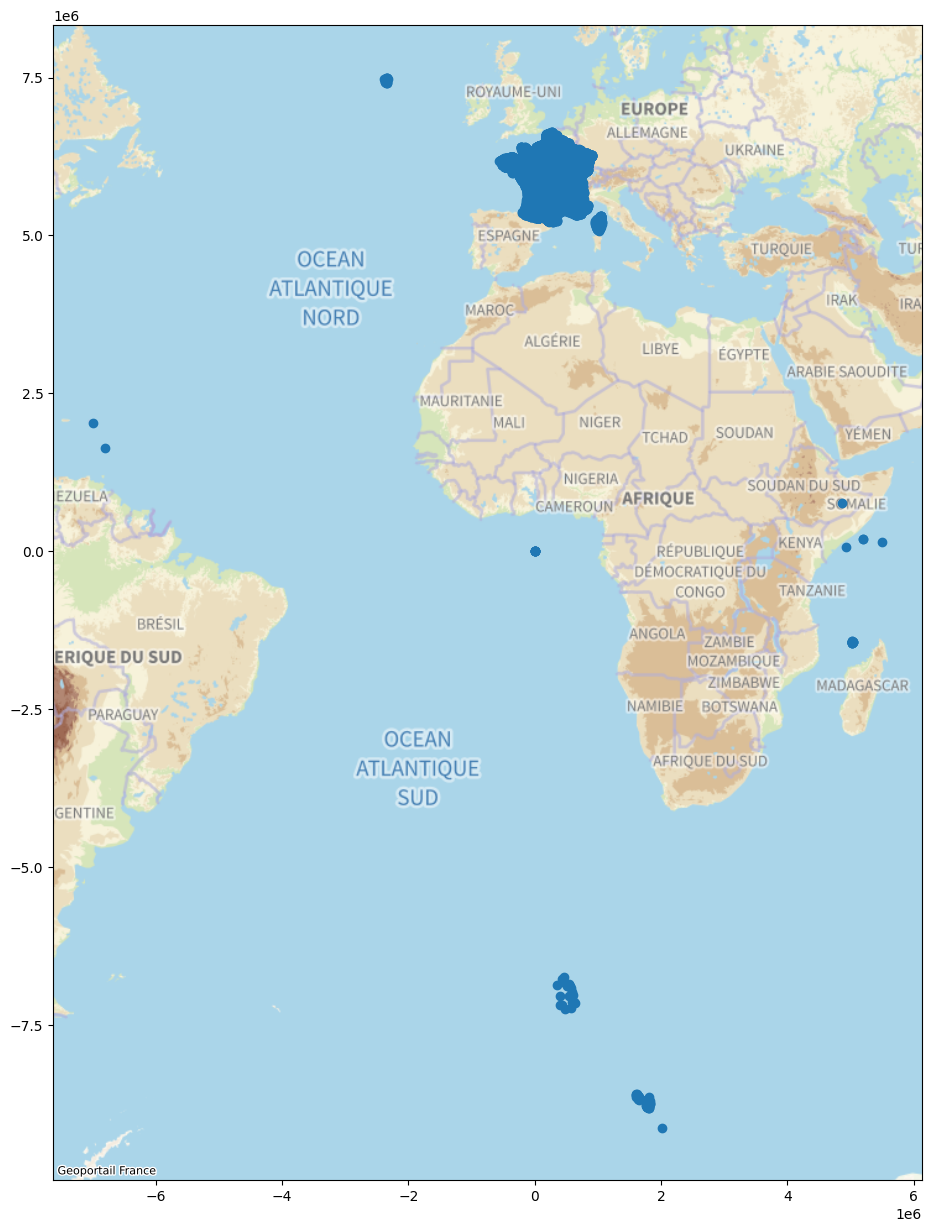

In [38]:
fig, ax = plt.subplots(figsize=(15, 15)) 

villes.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax, crs="epsg:3857", source=xyz.GeoportailFrance.plan)

plt.show()

Revenons aux bizareries :

In [39]:
from matplotlib.patches import Rectangle

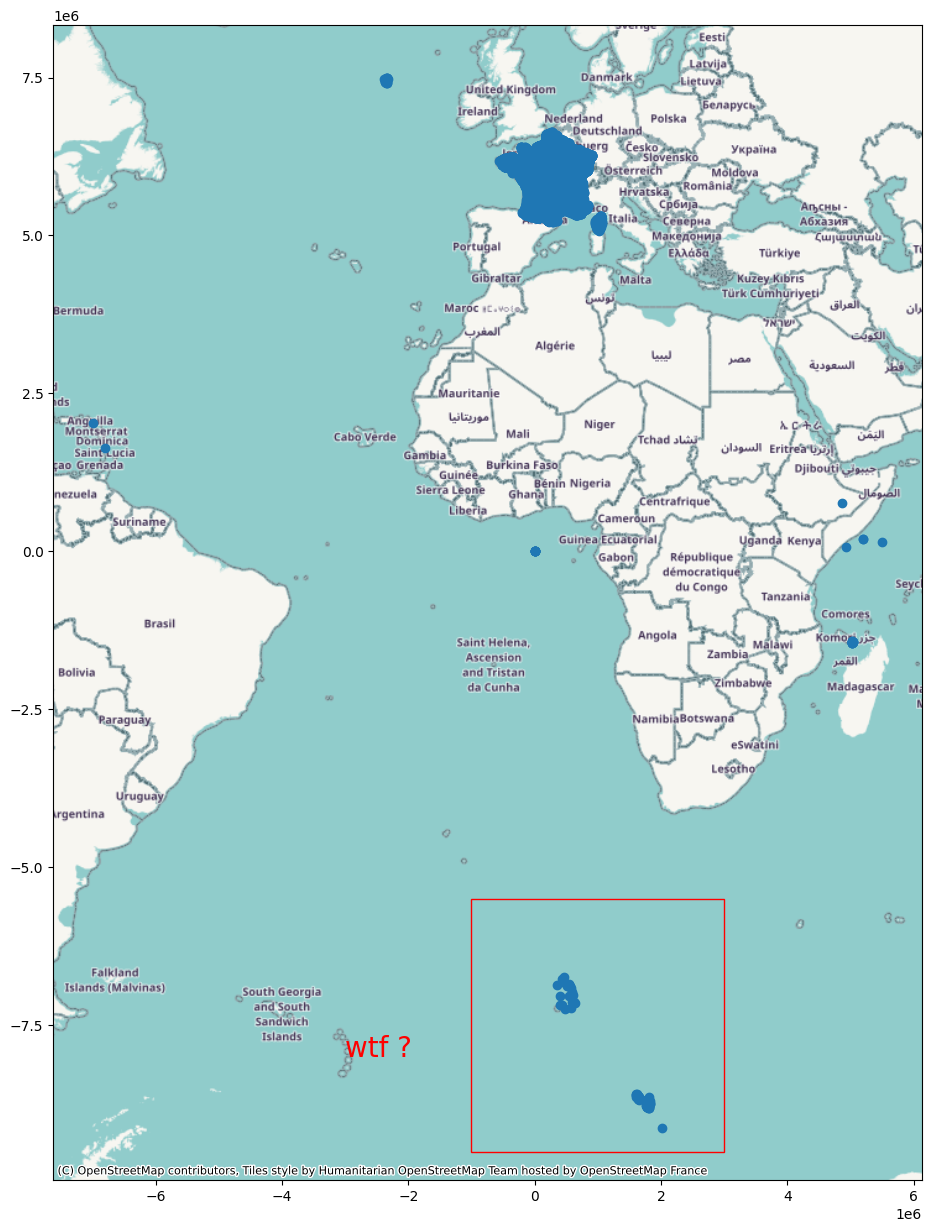

In [40]:

fig, ax = plt.subplots(figsize=(15, 15)) 

villes.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax, crs="epsg:3857")

ax.add_artist(Rectangle((-1e6, -9.5e6), 4e6, 4e6, 
                     facecolor="none", 
                     edgecolor="red"))
ax.text(-3e6, -8e6, "wtf ?",
       color="red", size=20)

plt.show()

Il faudrait pouvoir connaitre les villes dans ce carré. Ca tombe bien c'est ce qu'on va apprendre tout de suite.

## Opérations sur des géodataframe

On ne va pas en faire beaucoup, je vous laisserai lire les docs (voir section tuto ci-après). Je vais juste essayer de vous mettre l'eau à la bouche.

### point dans un polygone.

In [41]:
from shapely.geometry import Polygon

In [42]:
sud = Polygon([(-100, -100), (-100, -40), (100, -40), (100, -100)])

In [43]:
villes.geometry.within(sud)

0
1        False
2        False
3        False
4        False
5        False
         ...  
36825    False
36826    False
36827    False
36828     True
36830    False
Length: 36700, dtype: bool

In [44]:
villes[villes.geometry.within(sud)]

,nom,population,longitude,latitude,geometry
0,,,,,
36569,Abymes,58534,16.30650,-61.5106,POINT (16.30650 -61.51060)
36570,Anse-Bertrand,4775,16.47140,-61.5099,POINT (16.47140 -61.50990)
36571,Baie-Mahault,30251,16.25760,-61.5883,POINT (16.25760 -61.58830)
36572,Baillif,5214,16.02500,-61.7287,POINT (16.02500 -61.72870)
36573,Basse-Terre,11915,16.00150,-61.7183,POINT (16.00150 -61.71830)
...,...,...,...,...,...
36653,Saint-Élie,555,4.82603,-53.2882,POINT (4.82603 -53.28820)
36654,Apatou,6704,5.15380,-54.3420,POINT (5.15380 -54.34200)
36655,Awala-Yalimapo,1305,5.73369,-53.9042,POINT (5.73369 -53.90420)


C'est des erreurs (encore !) dans la base de données. [POMPIDOU PAPA ICHTON](https://fr.wikipedia.org/wiki/Papaichton) est une ville de guyane. 

In [45]:
villes.loc[36656]

nom               POMPIDOU PAPA ICHTON
population                        4827
longitude                      3.92768
latitude                      -54.0777
geometry      POINT (3.92768 -54.0777)
Name: 36656, dtype: object

Longitude et latitude ont été inversées pour certaines coordonnées. Ce n'est pas sérieux mais sans une étude préalable des données ont aurait rien vu... 
On va donc se concentrer sur la métropole qui a l'air correcte.

### associer sa région à une ville

https://geopandas.org/mergingdata.html#spatial-joins

In [46]:
villes.head()

,nom,population,longitude,latitude,geometry
0,,,,,
1,Ozan,618,4.91667,46.3833,POINT (4.91667 46.38330)
2,Cormoranche-sur-Saône,1058,4.83333,46.2333,POINT (4.83333 46.23330)
3,Plagne,129,5.73333,46.1833,POINT (5.73333 46.18330)
4,Tossiat,1406,5.31667,46.1333,POINT (5.31667 46.13330)
5,Pouillat,88,5.43333,46.3333,POINT (5.43333 46.33330)


In [47]:
regions.head()

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ..."
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.62655 46.75228, ..."
3,28,Normandie,"MULTIPOLYGON (((-1.11962 49.35557, -1.11554 49..."
4,32,Hauts-de-France,"POLYGON ((4.14090 49.97876, 4.14407 49.97625, ..."


On va créer une nouvelle table avec pour chaque ville le nom de sa région. La jointure se fait sur les données spaciales :

In [48]:
villes_regions = gpd.sjoin(villes, regions, how="inner", predicate='intersects')

In [49]:
villes_regions.head()

,nom_left,population,longitude,latitude,geometry,index_right,code,nom_right
0,,,,,,,,
1,Ozan,618,4.91667,46.3833,POINT (4.91667 46.38330),10,84,Auvergne-Rhône-Alpes
2,Cormoranche-sur-Saône,1058,4.83333,46.2333,POINT (4.83333 46.23330),10,84,Auvergne-Rhône-Alpes
3,Plagne,129,5.73333,46.1833,POINT (5.73333 46.18330),10,84,Auvergne-Rhône-Alpes
4,Tossiat,1406,5.31667,46.1333,POINT (5.31667 46.13330),10,84,Auvergne-Rhône-Alpes
6,Torcieu,698,5.40000,45.9167,POINT (5.40000 45.91670),10,84,Auvergne-Rhône-Alpes


Il reste des colonnes en trop, épurons le tout :

In [50]:
villes = villes_regions.drop(columns=["index_right"]).rename({"nom_left": "nom", "nom_right": "région"}, axis=1)

In [51]:
villes.head()

,nom,population,longitude,latitude,geometry,code,région
0,,,,,,,
1,Ozan,618,4.91667,46.3833,POINT (4.91667 46.38330),84,Auvergne-Rhône-Alpes
2,Cormoranche-sur-Saône,1058,4.83333,46.2333,POINT (4.83333 46.23330),84,Auvergne-Rhône-Alpes
3,Plagne,129,5.73333,46.1833,POINT (5.73333 46.18330),84,Auvergne-Rhône-Alpes
4,Tossiat,1406,5.31667,46.1333,POINT (5.31667 46.13330),84,Auvergne-Rhône-Alpes
6,Torcieu,698,5.40000,45.9167,POINT (5.40000 45.91670),84,Auvergne-Rhône-Alpes


Réordonnons les colonnes : 

In [52]:
villes = villes[['nom', 'région', 'population', 'longitude', 'latitude', 'geometry']]

In [53]:
villes

,nom,région,population,longitude,latitude,geometry
0,,,,,,
1,Ozan,Auvergne-Rhône-Alpes,618,4.91667,46.3833,POINT (4.91667 46.38330)
2,Cormoranche-sur-Saône,Auvergne-Rhône-Alpes,1058,4.83333,46.2333,POINT (4.83333 46.23330)
3,Plagne,Auvergne-Rhône-Alpes,129,5.73333,46.1833,POINT (5.73333 46.18330)
4,Tossiat,Auvergne-Rhône-Alpes,1406,5.31667,46.1333,POINT (5.31667 46.13330)
6,Torcieu,Auvergne-Rhône-Alpes,698,5.40000,45.9167,POINT (5.40000 45.91670)
...,...,...,...,...,...,...
36564,Piazzole,Corse,47,9.40195,42.3934,POINT (9.40195 42.39340)
36565,San-Gavino-d'Ampugnani,Corse,85,9.42251,42.4123,POINT (9.42251 42.41230)
36566,Verdèse,Corse,38,9.36473,42.3917,POINT (9.36473 42.39170)


### compter le nombre de villes par régions

On va ajouter une colonne à régions qui contient le nombre de villes que possède la région.

#### nombre de villes par régions

On commence par compter le nombre de villes par région avec un [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

1. On crée une colonne de 1 que l'on va sommer
2. On groupe par nom de région
3. on somme les colonnes groupées

On obtient une dataframe où tout ce qui est sommable l'a été, en particulier notre colonne de 1 :

In [54]:
villes.assign(nombre=1)

,nom,région,population,longitude,latitude,geometry,nombre
0,,,,,,,
1,Ozan,Auvergne-Rhône-Alpes,618,4.91667,46.3833,POINT (4.91667 46.38330),1
2,Cormoranche-sur-Saône,Auvergne-Rhône-Alpes,1058,4.83333,46.2333,POINT (4.83333 46.23330),1
3,Plagne,Auvergne-Rhône-Alpes,129,5.73333,46.1833,POINT (5.73333 46.18330),1
4,Tossiat,Auvergne-Rhône-Alpes,1406,5.31667,46.1333,POINT (5.31667 46.13330),1
6,Torcieu,Auvergne-Rhône-Alpes,698,5.40000,45.9167,POINT (5.40000 45.91670),1
...,...,...,...,...,...,...,...
36564,Piazzole,Corse,47,9.40195,42.3934,POINT (9.40195 42.39340),1
36565,San-Gavino-d'Ampugnani,Corse,85,9.42251,42.4123,POINT (9.42251 42.41230),1
36566,Verdèse,Corse,38,9.36473,42.3917,POINT (9.36473 42.39170),1


In [55]:
compte = (villes
             .assign(nombre=1)
             .groupby(by="région", as_index=False)
             .sum(numeric_only=True)
        )
compte

,région,population,longitude,latitude,nombre
0,Auvergne-Rhône-Alpes,7612300,19203.401070,190517.4987,4184
1,Bourgogne-Franche-Comté,2790581,19635.424880,180892.8019,3830
2,Bretagne,2932238,-3215.323040,56181.5893,1165
3,Centre-Val de Loire,2671232,3118.091158,90454.0255,1900
4,Corse,309693,3300.297350,15211.8989,360
5,Grand Est,5526368,29967.064700,252735.8232,5189
6,Hauts-de-France,5945870,10552.585840,191216.2800,3827
7,Normandie,3284180,483.033299,158379.6735,3221
8,Nouvelle-Aquitaine,5745466,883.243746,203026.1638,4499
9,Occitanie,5517115,8684.996878,199709.2337,4579


#### ajout de la colonne nombre pour les régions

Il nous reste à merger cette nouvelle table dans le geodataframe des régions :

1. Il faut que la colonne de merge ait le même nom donc on commence par renommer la colonne de compte
2. on peut ensuite faire le merge

On a utilisé l'attribut `inplace=True` qui modifie la dataframe plutôt que d'en créer une nouvelle. Utiliser ça avec paercimonie, car modifer une dataframe n'est presque jamais une bonne solution.

In [56]:
compte.rename(columns={"région": "nom"}, inplace=True)

Tout est prêt on peut merger le résultat. On a pas besoin de toutes les colonnes de compte, juste de `'nom'` et `'nombre'` :

In [57]:
regions = regions.merge(compte[['nom', 'nombre']], how='inner', on='nom')

In [58]:
regions

,code,nom,geometry,nombre
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...",1303
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ...",1900
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.62655 46.75228, ...",3830
3,28,Normandie,"MULTIPOLYGON (((-1.11962 49.35557, -1.11554 49...",3221
4,32,Hauts-de-France,"POLYGON ((4.14090 49.97876, 4.14407 49.97625, ...",3827
5,44,Grand Est,"POLYGON ((4.23316 49.95775, 4.23690 49.95858, ...",5189
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.62284 47.40975, -2.62341 47...",1474
7,53,Bretagne,"MULTIPOLYGON (((-3.47716 48.88127, -3.47863 48...",1165
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((1.41519 46.34722, 1.41675 46.3...",4499
9,76,Occitanie,"MULTIPOLYGON (((1.78613 42.57362, 1.78661 42.5...",4579


## Carte chloroplète

Une [carte chloroplète](https://fr.wikipedia.org/wiki/Carte_choropl%C3%A8the) associe donnée et cartographie.

### Pandas

La géographie peut se représenter directement avec GeoPandas :

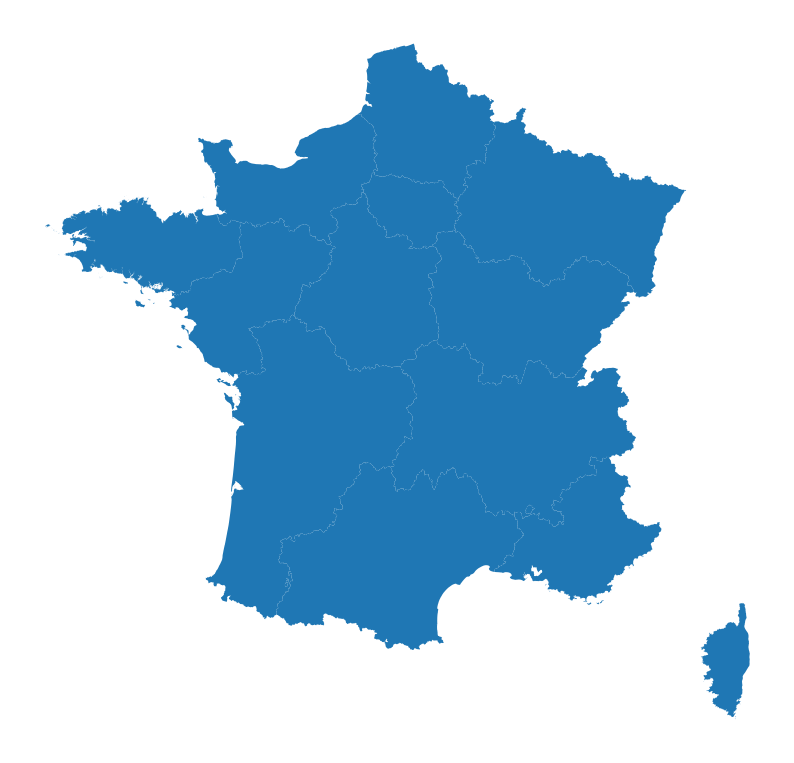

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.axis(False)

regions.plot(ax=ax)

plt.show()

L'idée est de colorier chaque région en fonction du nombre. Ce si se fait facilement en ajoutant des paramètres (voir [cette doc](https://geopandas.org/en/stable/docs/user_guide/mapping.html)) :

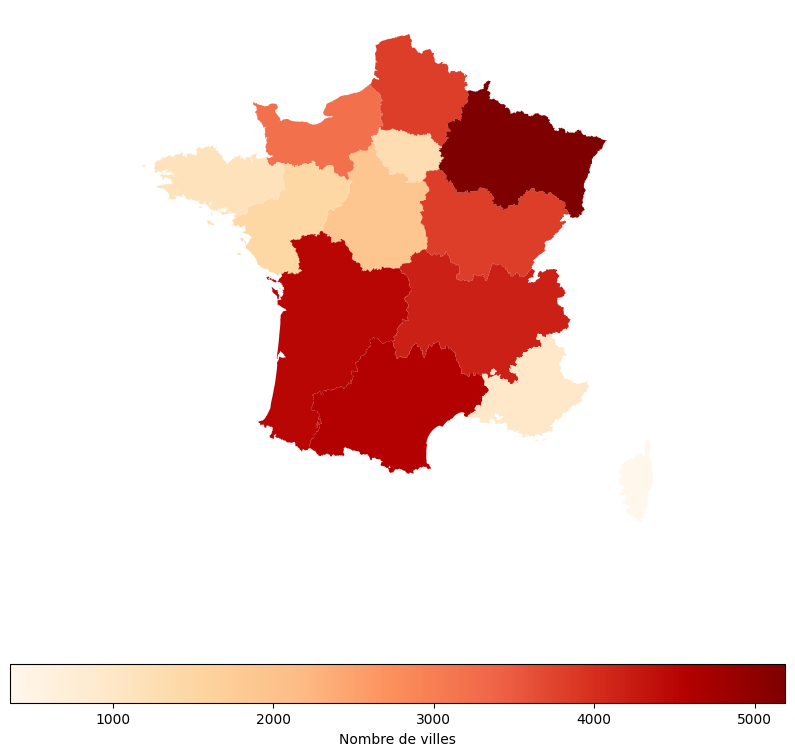

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.axis(False)

regions.plot(column='nombre', 
             legend=True,
             legend_kwds={'label': "Nombre de villes", 'orientation': "horizontal"},
             cmap='OrRd',
             ax=ax)


plt.show()

On pourrait utiliser ce qu'on a vu précédemment pour colorier chaque région avec une coluleur spécifique et ainsi faire de plus jolies graphiques, mais plot permet d'avoir un résultat rapide et consitue une première solution.

### Leaflet et folium

On utilise souvent une carte interactive pour représenter ces cartes chloroplète.  

Geopandas permet de le faire directeemnt avec la méthode `explore` (voir [la doc](https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html) :

In [68]:
regions.explore(column='nombre',
                cmap='OrRd')

On peut aussi le faire à la main en utilisant la bibliothèque folium

> TBD reprendre cours
>
> 1. carte centée sur la france
> 2. les régions
> 3. le nombre
> 4. on ajoute ecm avec un marker

## Pour aller plus loin

### Opérations sur les géométries

Pour aller plus loin dans l'utilsation de shapely, vous pouvez :
* regarder ce tuto shapely en 2 parties : https://www.youtube.com/watch?v=LwpqA2WMR_8 et https://www.youtube.com/watch?v=3fm7x3TRcWs
* lire [la doc](https://shapely.readthedocs.io/en/latest/). Elle fourmille d'exemples sur les manipulations et conversions que l'on peut faire


### opérations sur les géodataframes

* https://www.youtube.com/watch?v=HtYxzt55-1w : les opérations geométriques disponibles très bien fait !)
* sur le [site de geopandas](https://geopandas.org/) même. Les user guide sont super bien. Par exemple :
    * https://geopandas.org/set_operations.html 
    * https://geopandas.org/geometric_manipulations.html

### Geoplot

Pour dessiner plus de choses. C'est une surcouche de cartopy donc l'installation est plus ardue.
<https://residentmario.github.io/geoplot/>